Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

Create a dataframe named "data" from the given datafile and print it's head

In [5]:
data = pd.read_csv(r"C:\Users\Nigel K. Rodrigues\Desktop\Imarticus\Sem 2\Machine Learning\LR Dataset\datasets_insurance.csv",header=0)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [7]:
print(data.dtypes)
print(data.shape)
print(data.describe())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
(1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Check if there are missing values. If yes, handle them.

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

In [11]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: >

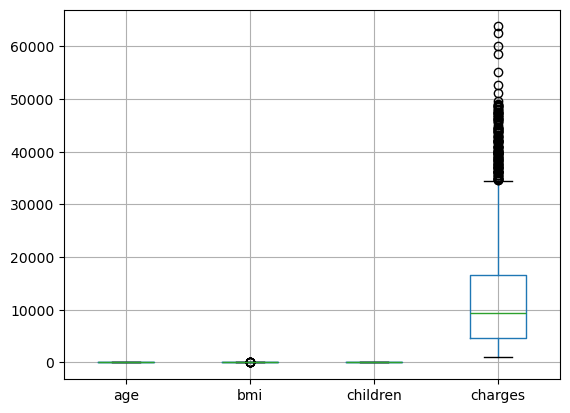

In [12]:
data.boxplot(column=['age','bmi','children','charges'])

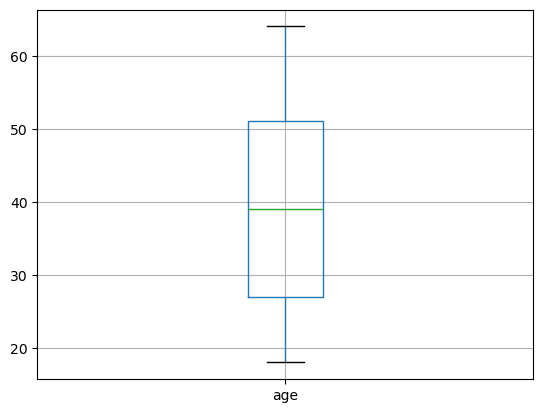

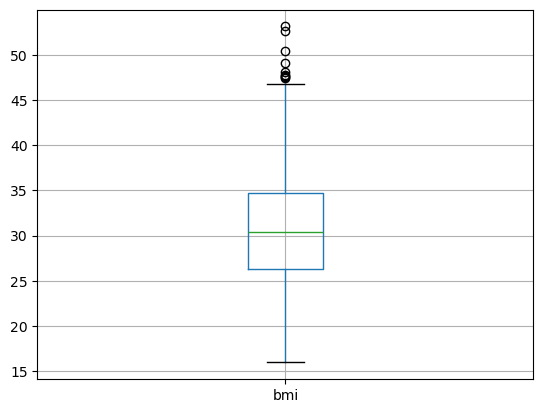

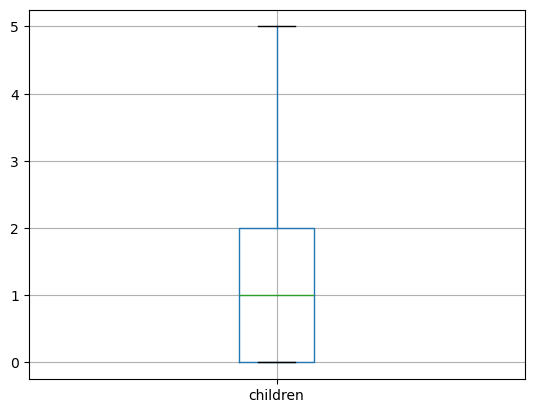

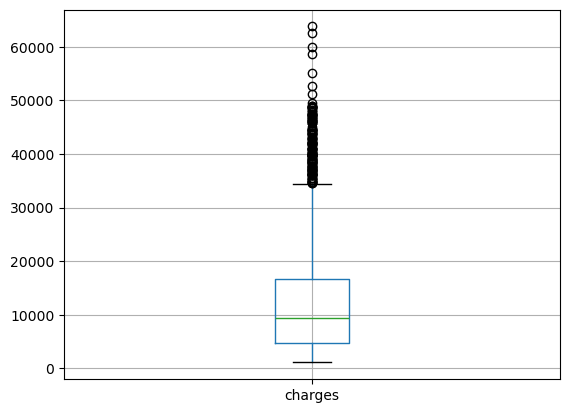

In [13]:
g = ['age','bmi','children','charges']
for i in data.columns:
    if i in g:
        data.boxplot(column=i)
        plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

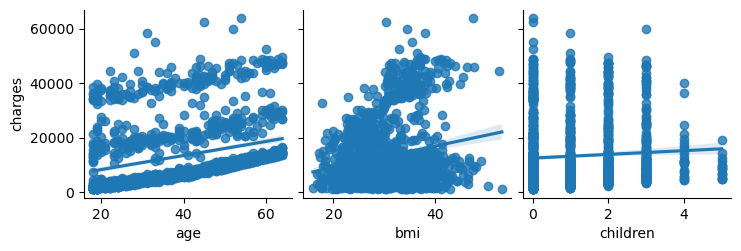

In [15]:
sns.pairplot(data,x_vars=['age','bmi','children'],
            y_vars=["charges"],kind = "reg")
plt.show()

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3<br><br>
Hint: df.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [17]:
data.sex.replace({"female":0,"male":1},inplace=True)
data.smoker.replace({"no":0,"yes":1},inplace=True)
data.region.replace({"northeast":0,"northwest":1,"southeast":3,"southwest":4},inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Create X and Y

In [19]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]

Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

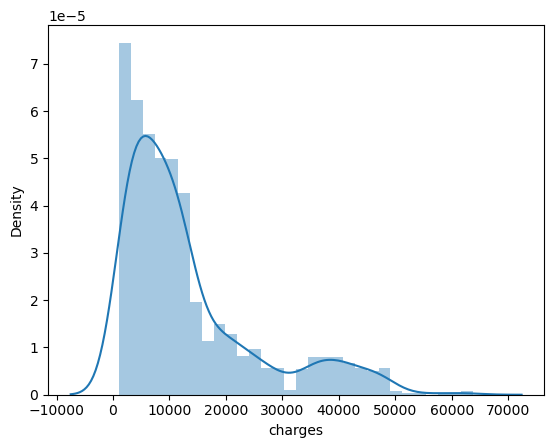

In [21]:
sns.distplot(Y)
plt.show()

In [22]:
Y_log = np.log(Y)

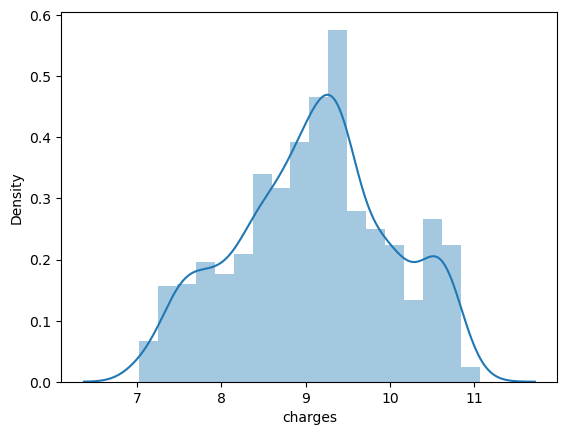

In [23]:
sns.distplot(Y_log)
plt.show()

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

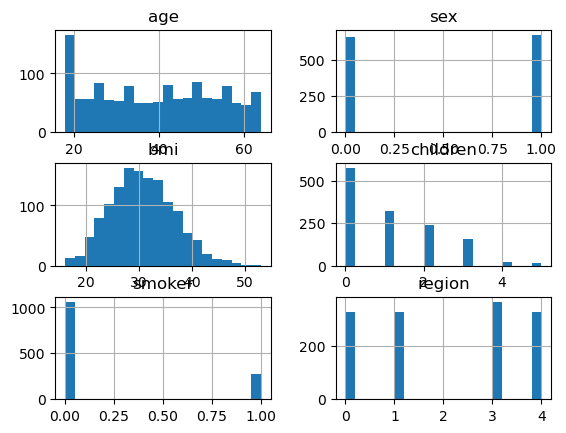

In [25]:
X.hist(bins=20)
plt.show()

In [26]:
from scipy.stats import skew
#finding the skewnwess in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)] 
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
#X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])            # using log transfromation to remove skewness. 
#X["newspaper"] = np.log1p(X["newspaper"])

# As the skewness is in non-continuouse variable not using log transformation

age         0.055610
sex        -0.020928
bmi         0.283729
children    0.937328
smoker      1.463124
region     -0.049551
dtype: float64
children    0.937328
smoker      1.463124
dtype: float64


Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.000935
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.006952
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.186092
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.011128
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.007807
region    0.000935  0.006952  0.186092  0.011128  0.007807  1.000000


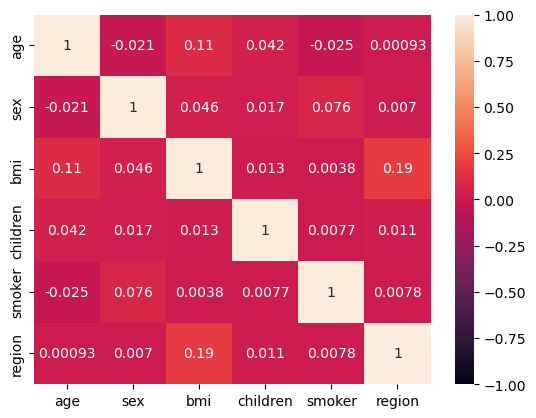

In [28]:
corr_df= X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df['features']= X.columns
vif_df['VIF Factor'] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.38
3,children,1.80
4,smoker,1.26
5,region,2.76


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [31]:
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train, X_test, Y_train, Y_test= train_test_split(X, Y_log, test_size=0.2, random_state=10)   # using Y_log as log transformed

Build a base Linear Regression model using sklearn.

In [33]:
from sklearn.linear_model import LinearRegression
# create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

6.989817746988475
[ 0.03498027 -0.07103767  0.01282959  0.09954269  1.57045866 -0.02814503]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [35]:
print(list(zip(X.columns,lm.coef_)))

[('age', 0.034980269668488106), ('sex', -0.07103766881707657), ('bmi', 0.012829587248692667), ('children', 0.09954268969262102), ('smoker', 1.5704586592326748), ('region', -0.02814502827524154)]


Predict using the model.

In [37]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[ 8.91046352  8.56588588  9.44555625  9.36094516  8.3100547   8.92941549
  9.21805784  9.61933553  8.95125341 10.52068246  8.12900879  8.26860443
  8.75688583  9.14800184  9.22912386  9.36884803  8.31550976  9.8192026
  9.18509751 10.20762032 10.53012085  8.07725783  7.95707319  8.76840938
  8.42402795  9.42771619  9.0203949   9.42468659  8.42458191 10.20350915
  7.72485092 10.39285895  8.88734738  8.94098024  8.44789963  8.88481179
  9.44455598  9.09601984  9.08984874  8.8959479   9.58190994  9.16415639
  8.55247896  8.99697296  7.99179907  8.80997527  8.90859522 10.61695256
  9.29950679  9.24964673 10.01283015  8.30961785  8.91221188  9.62606038
  9.09050685  9.37317151  9.30322915  8.63271011  8.70942582 10.69635235
  7.87506622 10.61821465 11.08203063  7.94825705 10.00453939  8.87600911
  8.48563603  8.91636856  8.86872584  8.93004605  8.81573539  7.94880504
  8.85861208  8.90332688  8.96965392  9.33073893  8.54853362  8.83265032
  7.81730449  9.33948891  9.27137719  9.17936169  9.

Evaluate the model.

In [39]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual charges"]=Y_test
new_df["Predicted charges"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)
new_df

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
0,37,0,27.740,3,0,1,8.893093,8.910464
1,36,0,26.885,0,0,1,8.569372,8.565886
2,59,1,37.100,1,0,4,9.421182,9.445556
3,61,0,25.080,0,0,3,10.106963,9.360945
4,29,0,26.030,0,0,1,8.225895,8.310055
...,...,...,...,...,...,...,...,...
263,50,1,34.200,2,1,4,10.665620,10.763529
264,26,0,40.185,0,0,1,8.071295,8.386717
265,19,1,27.265,2,0,1,10.020989,8.104144
266,57,1,40.945,0,0,0,9.355851,9.437963


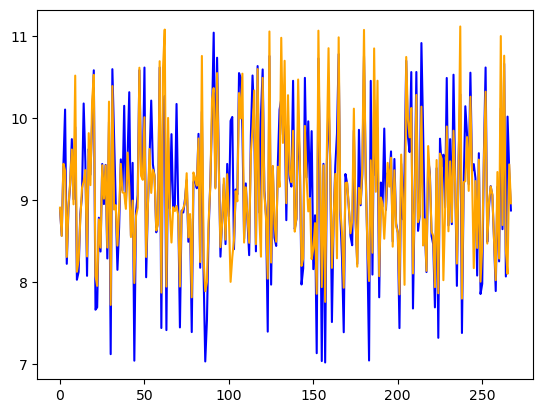

In [40]:
new_df["Actual charges"].plot(color='blue')
new_df["Predicted charges"].plot(color='orange')
plt.show()

In [41]:
lm.score(X_train, Y_train)

0.7812540040846443

Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [43]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)

"""
previous values:
3.3532913858151563
[ 0.0437425   0.19303708 -0.04895137]
"""
# print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

6.991431485572808
[ 0.03497656 -0.07016021  0.01282947  0.09943408  1.56133317 -0.0281156 ]


In [44]:
Y_pred=rid.predict(X_test)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7059927081111056
RMSE: 0.4873720975022911
Adj R-square: 0.7046673559312909


In [46]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)

# print intercept and coefficients
print(las.intercept_)
print(las.coef_)

7.895875452206857
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [47]:
Y_pred=las.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [107]:
new_df=pd.DataFrame()
new_df= X_train.copy()

new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>

In [109]:
import statsmodels.formula.api as sm
 
# create a fitted model with all features
lm_model = sm.ols(formula='charges ~ age + sex + bmi + children + smoker + region', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    6.989818
age          0.034980
sex         -0.071038
bmi          0.012830
children     0.099543
smoker       1.570459
region      -0.028145
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.8
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:32:36   Log-Likelihood:                -620.38
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

Predict using the model. Evaluate the model.

In [ ]:
Y_pred = lm_model.predict(X_test)

In [111]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


Write down your conclusion as to which is the final model that you would go with along with the reasons.

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [113]:
sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],
             "smoker":[1,0,1,0,0,0,0],
             "region":[0,1,1,3,2,3,1]}

X_test_sample = pd.DataFrame(sample_data)
X_test_sample

,age,sex,bmi,children,smoker,region
0,56,1,19.950,0,1,0
1,51,0,18.050,0,0,1
2,31,1,34.390,3,1,1
3,64,1,25.600,2,0,3
4,44,0,23.980,2,0,2
5,43,1,32.600,2,0,3
6,56,1,33.725,0,0,1


In [117]:
Y_pred_sample=rid.predict(X_test_sample)

The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [119]:
og_values = np.exp(Y_pred_sample)

print("Log-transformed predictions:", round(Y_pred_sample,4))
print("Original predictions:", round(og_values,4))


Log-transformed predictions: [10.69723989  8.97869252 10.27826993  9.60272708  8.98068787  8.9580255
  9.28451702]
Original predictions: [44233.59700934  7932.25407114 29093.49617906 14805.10118969
  7948.09747417  7770.00041423 10769.97042702]


Save the predicted values along with the observations into an excel file.